<a href="https://www.kaggle.com/code/jaiminmukeshjariwala/fashion-mnist-multiclass-classification-tensorflow?scriptVersionId=118702433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

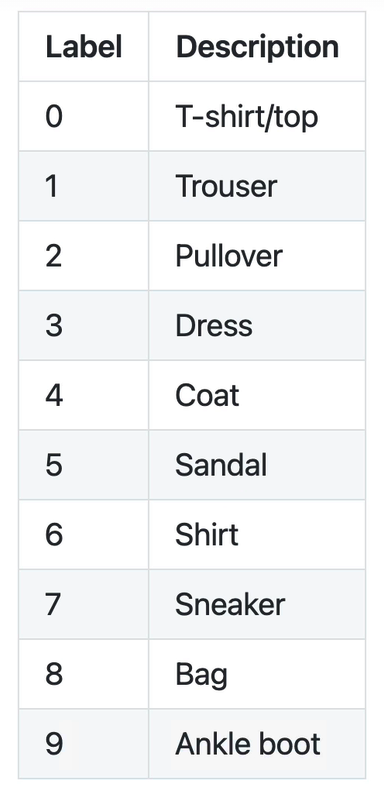

### **So our 1st sample is an Ankle boot as represented above by class 9**
* Now checking the shape of a single example...

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

**so train_data[0] shape is 28x28 and the train_labels[0] is just a scaler(a number) so it has no shape!**

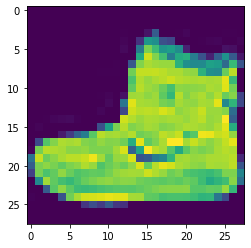

In [6]:
# Plotting a single sample...
plt.imshow(train_data[0])

In [7]:
# Checking out sample labels...
train_labels[0]

9

In [8]:
# Creating a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

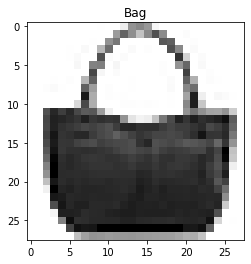

In [9]:
# Now plotting an example image and it's label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

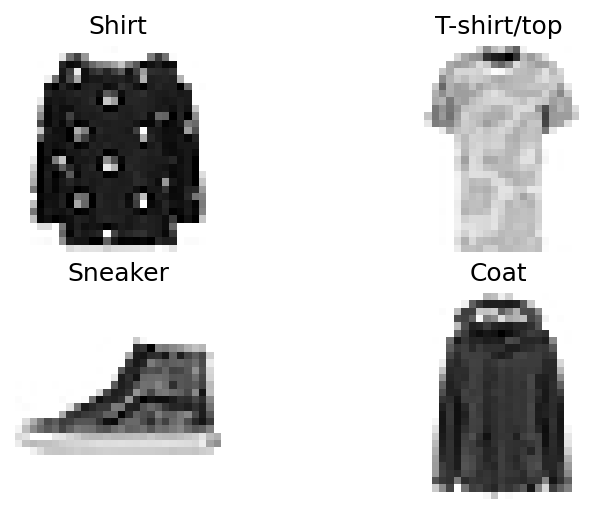

In [10]:
# Plotting Multiple Random Images of Fashion MNIST
import random
plt.figure(dpi=150)
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))    # will pick a random number in length of training data
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)    # if we don't want any ticks onto over plots

## **Building a Multiclass Classification Model...**
* Input Shape = 28 x 28 (the shape of 1 image)
* Output Shape = 10 (1 per class of clothing)
* losses = tf.keras.losses.CategorcialCrossentropy()
    * **If our labels are OneHotEncoded, use tf.keras.losses.CategoricalCrossentropy()**
    * **If our labels are Integer Form use tf.keras.losses.SparseCategoricalCrossentropy()**
* Output layer activation = softmax (and not sigmoid)

In [11]:
# Setting up the random seed...
tf.random.set_seed(42)

# Creating a model...
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compiling a model...
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fitting up the model...
non_norm_history_1 = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

2023-02-09 17:58:31.268165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 17:58:31.355459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 17:58:31.356237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 17:58:31.358041: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1792 - accuracy: 0.1608 - val_loss: 1.8065 - val_accuracy: 0.2020
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7194 - accuracy: 0.2439 - val_loss: 1.6586 - val_accuracy: 0.3100
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6398 - accuracy: 0.2831 - val_loss: 1.6194 - val_accuracy: 0.2739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6125 - accuracy: 0.2902 - val_loss: 1.6007 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5963 - accuracy: 0.3058 - val_loss: 1.5776 - val_accuracy: 0.3338
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5880 - accuracy: 0.3124 - val_loss: 1.5642 - val_accuracy: 0.3196
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5782 - accuracy: 0.3196 - val_loss: 1.5733 - val_accuracy:

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### **In case of 1st Layer, Calculation of parameters explanation...**
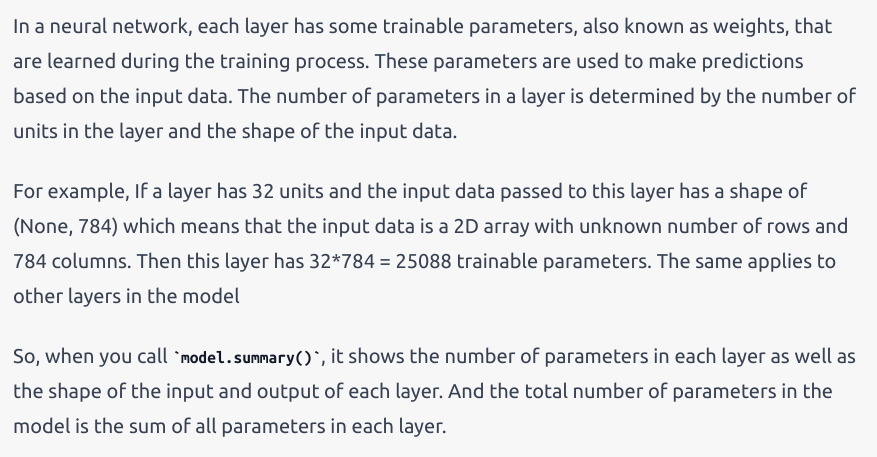
### **In case of Dense Layer, Calculation of parameters explanation...**
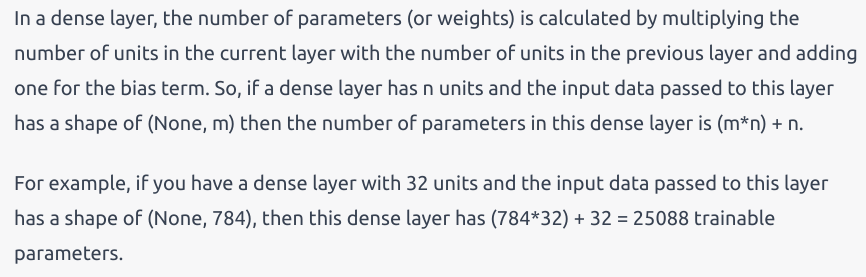

In [13]:
# Checking the minimum and maximum values of the training data
train_data.min(), train_data.max()

(0, 255)

### **Scaling the data to get more accuracy...**

In [14]:
train_data_norm = train_data / 255.0   
test_data_norm = test_data / 255.0  

# checking the min and max values of the scaled trained data...
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Now our data is normalized, let's again build and train a model...

# Setting up the Random Seed...
tf.random.set_seed(42)


# Creating a model...
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compiling the model...
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fitting the model...
norm_history_2 = model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### **Hence, all we did, is just the normalization of data which results in drastic increase in the accuracy on test and train data**

#### **Plotting and comparing the Non-Normalized Data Loss curves and Normalized Data Loss curves...**

<AxesSubplot:title={'center':'Normalized Data'}>

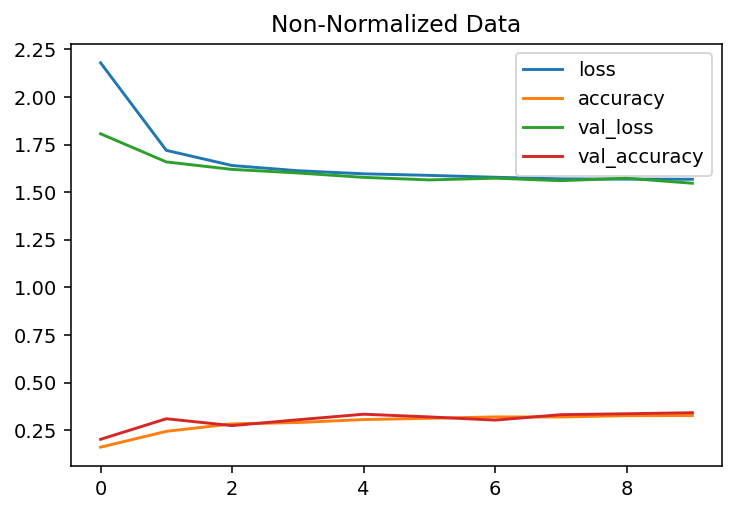

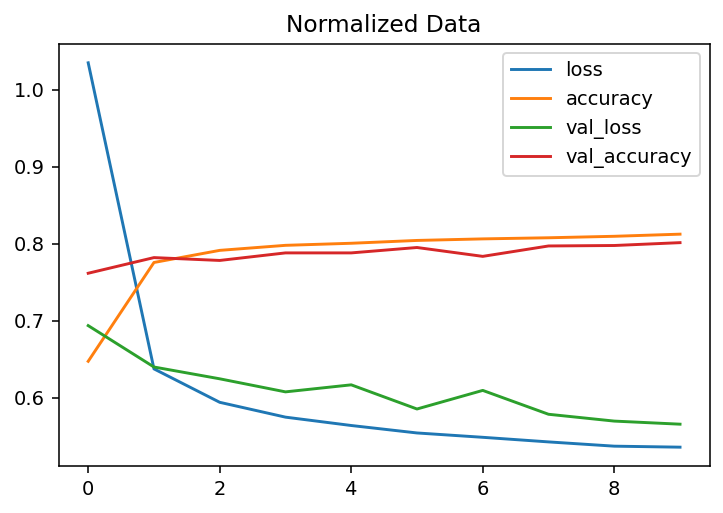

In [16]:
plt.rcParams["figure.dpi"] = 140
# Plotting Non-Normalized Data Loss Curve...
pd.DataFrame(non_norm_history_1.history).plot(title="Non-Normalized Data")

# Plotting Normalized Data Loss Curve...
pd.DataFrame(norm_history_2.history).plot(title="Normalized Data")

### **What is rcParams?**
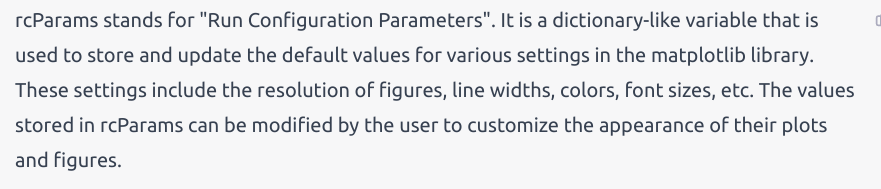
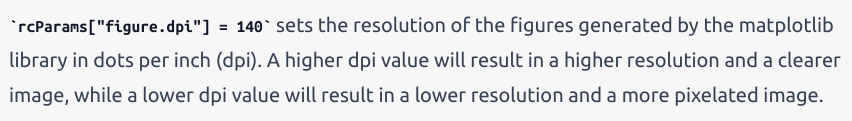

## **Finding the Ideal Learning Rate and building the model Once again to improve the accuracy even more...**

In [17]:
y = lambda epoch: 1e-3 * 10**(epoch/20)    # creating an anonymous(1 line function)
for i in range(1,41):
    print(i,":", y(i))

1 : 0.0011220184543019635
2 : 0.0012589254117941673
3 : 0.0014125375446227544
4 : 0.0015848931924611136
5 : 0.0017782794100389228
6 : 0.0019952623149688794
7 : 0.0022387211385683395
8 : 0.0025118864315095803
9 : 0.002818382931264454
10 : 0.0031622776601683794
11 : 0.003548133892335755
12 : 0.0039810717055349725
13 : 0.004466835921509632
14 : 0.005011872336272722
15 : 0.005623413251903491
16 : 0.006309573444801934
17 : 0.007079457843841379
18 : 0.007943282347242816
19 : 0.008912509381337454
20 : 0.01
21 : 0.011220184543019636
22 : 0.012589254117941675
23 : 0.01412537544622754
24 : 0.015848931924611134
25 : 0.01778279410038923
26 : 0.0199526231496888
27 : 0.022387211385683402
28 : 0.025118864315095794
29 : 0.028183829312644536
30 : 0.03162277660168379
31 : 0.03548133892335755
32 : 0.039810717055349734
33 : 0.04466835921509631
34 : 0.05011872336272723
35 : 0.05623413251903491
36 : 0.06309573444801933
37 : 0.07079457843841382
38 : 0.07943282347242814
39 : 0.08912509381337455
40 : 0.1


### **As seen above, epoch/20 indicates that the learning rate will be updated after 20 epochs i.e from 0.001 -> 0.01 -> 0.1**
### **Starting with a value of 1e-3(viz. 0.001) and  increasing by a factor of 10**

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Creating the learning rate callback...
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

finding_lr_history = model_3.fit(train_data_norm, 
                              train_labels, 
                              epochs=40, 
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

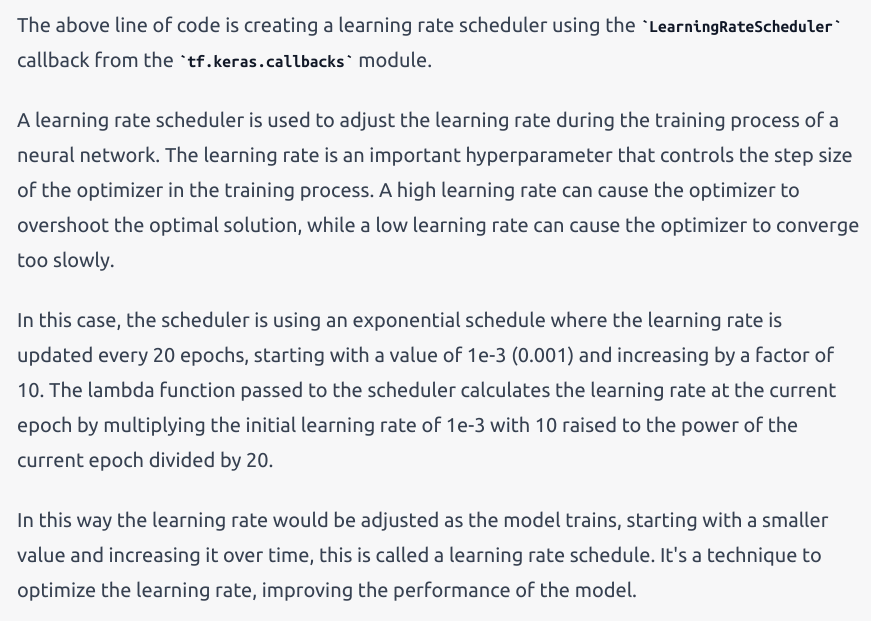

#### **Plotting the learning rate decay curve...**

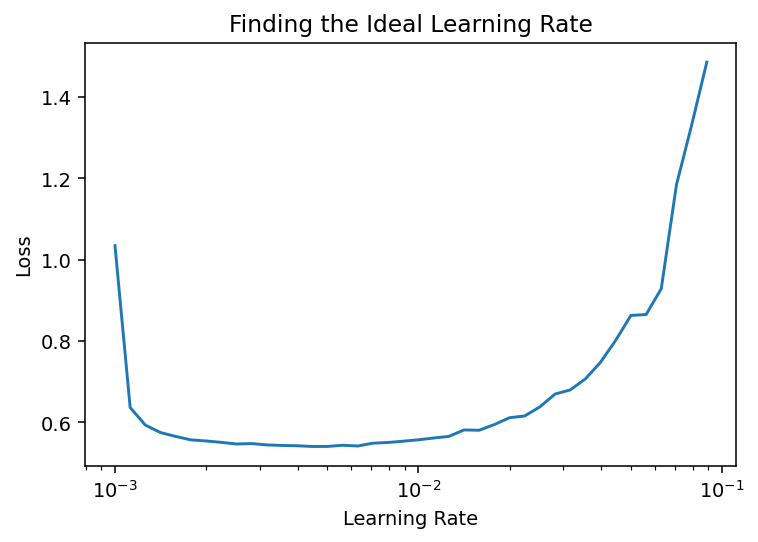

In [19]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, finding_lr_history.history['loss'])    # we want learning rate to be on the log scale...
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal Learning Rate");

#### **The Ideal learning rate is where the loss decreases sharply!**
## **So let's refit the model using the ideal learning rate...**

In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### **Evaluating our Multiclass Classification Model...**

In [21]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, text_size=7, figsize=(10,10)):
    
    # Create the Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]    # normalizing our confusion matrix
    n_classes = cm.shape[0]
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Creating a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Set labels to the classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
        
    # Labelling the axes
    ax.set(title='Confusion Matrix',
          xlabel="Predicted Label",
          ylabel='Trure Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Adjusting label size...
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [22]:
# Making some predictions with our model...
# y_probs is basically "Prediction Probabilities"

y_probs = model_4.predict(test_data_norm)

y_probs.shape

(10000, 10)

**The value which is more, indicates the index of the class name, which thereby showing the probability of that class to be that itself**

In [23]:
# so we will use the argmax...
tf.argmax(y_probs[0]).numpy()

# showing the class 9 viz. is an ankle boot!

9

In [24]:
# getting the equivalent class name...
class_names[tf.argmax(y_probs[0])]

'Ankle Boot'

In [25]:
# Converting all the prediction probabilities into integers...
y_preds = y_probs.argmax(axis=1)    # computes the index of the maximum value for each row of the array.

# Viewing the first 10 prediction labels...
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [26]:
test_labels

# hence test_labels are also same

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
y_probs[:3]

array([[8.5630308e-11, 3.5361904e-13, 2.6633779e-05, 4.6356206e-08,
        5.0949806e-05, 9.6119151e-02, 8.1778360e-08, 9.1868937e-02,
        4.0605241e-03, 8.0787367e-01],
       [3.4278651e-06, 1.2899363e-16, 9.5989138e-01, 2.0516293e-07,
        1.5329238e-02, 2.4532104e-13, 2.4142958e-02, 1.1383274e-28,
        6.3272100e-04, 4.4789040e-08],
       [6.1062892e-05, 9.9657685e-01, 4.3866816e-08, 3.3405789e-03,
        1.3249437e-05, 1.4383107e-21, 8.2790148e-06, 7.3236355e-18,
        5.4811402e-08, 4.9225059e-14]], dtype=float32)

In [28]:
# Plotting a simple Confusion Matrix...
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

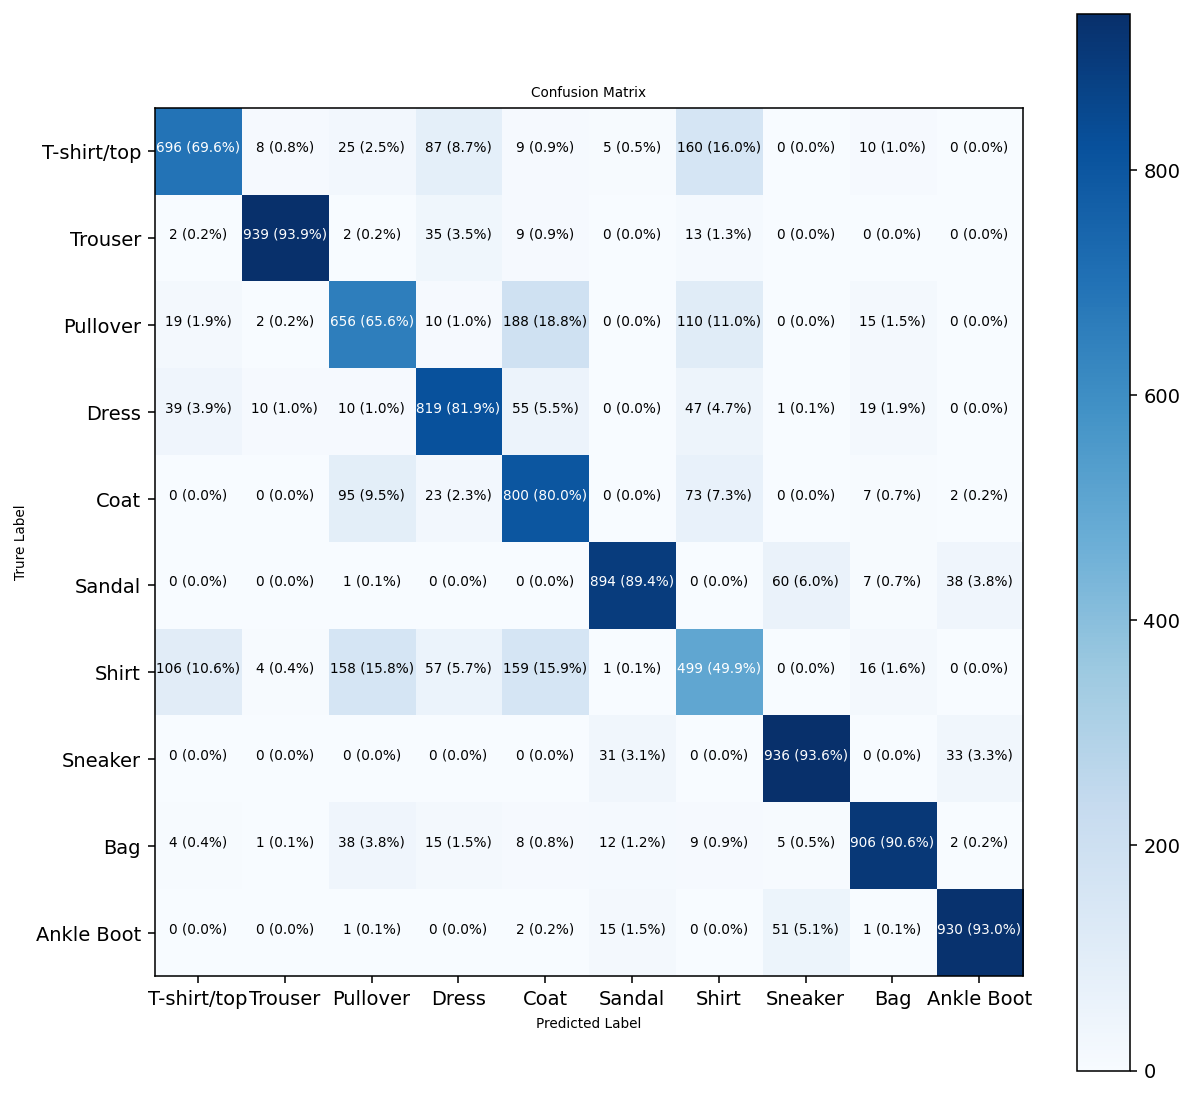

In [29]:
# Plotting a Prittier Confusion Matrix...
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names)

In [30]:
cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)
cm.shape

(10, 10)

In [31]:
# Showing result of random image with Prediction and True value

import random


def plot_random_image(model, images, true_labels, classes):
    """
    Pick a random image, plot it and labels it with a prediction and truth label.
    """
    
    # Setting up a random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # need to reshape because it's only 1 image
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red based on if prediction is right or wrong
    

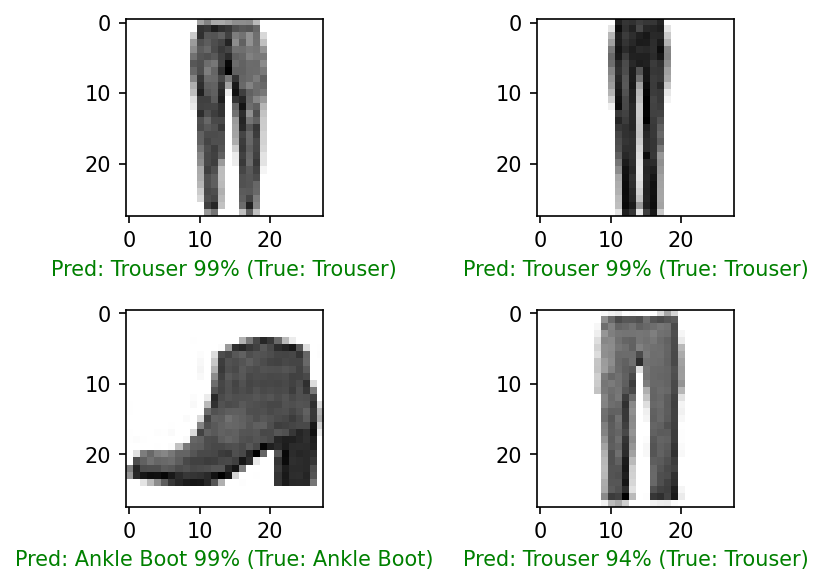

In [32]:
# Checking out a random image as well as it's predictions

plt.figure(dpi=150)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plot_random_image(model=model_4, images=test_data_norm, true_labels=test_labels, classes=class_names)